In [172]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

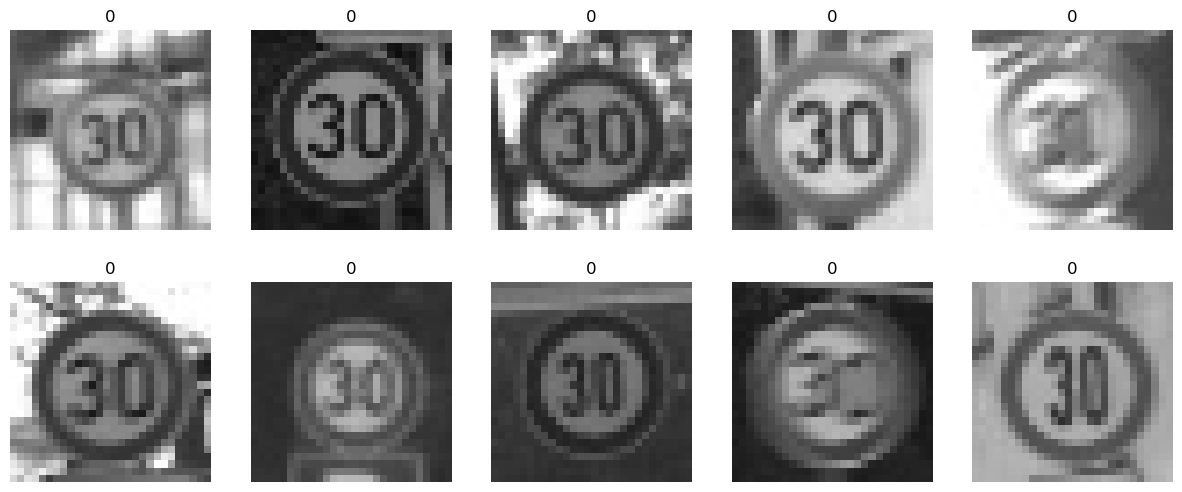

In [173]:
folder = 'C:/Users/user1/Downloads/subset_homework'
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

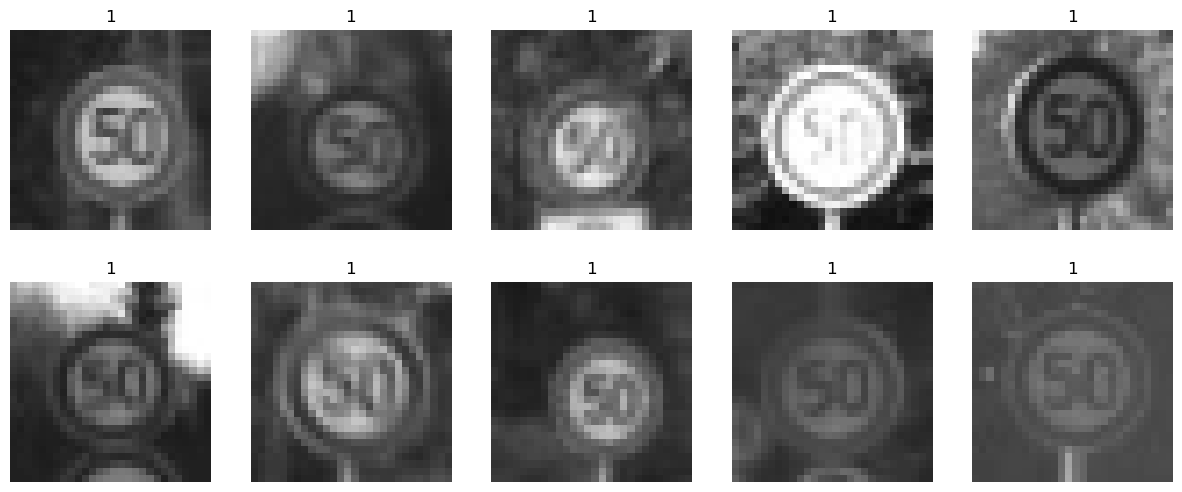

In [174]:
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [175]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


In [176]:
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [177]:
start = time()
pixels = []
for image in images:
    pixels_ = []
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            pixels_.append(image[r,c])
    pixels.append(pixels_)
    
pixels = np.array(pixels)/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 1.4969542026519775


In [178]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.03494620323181152


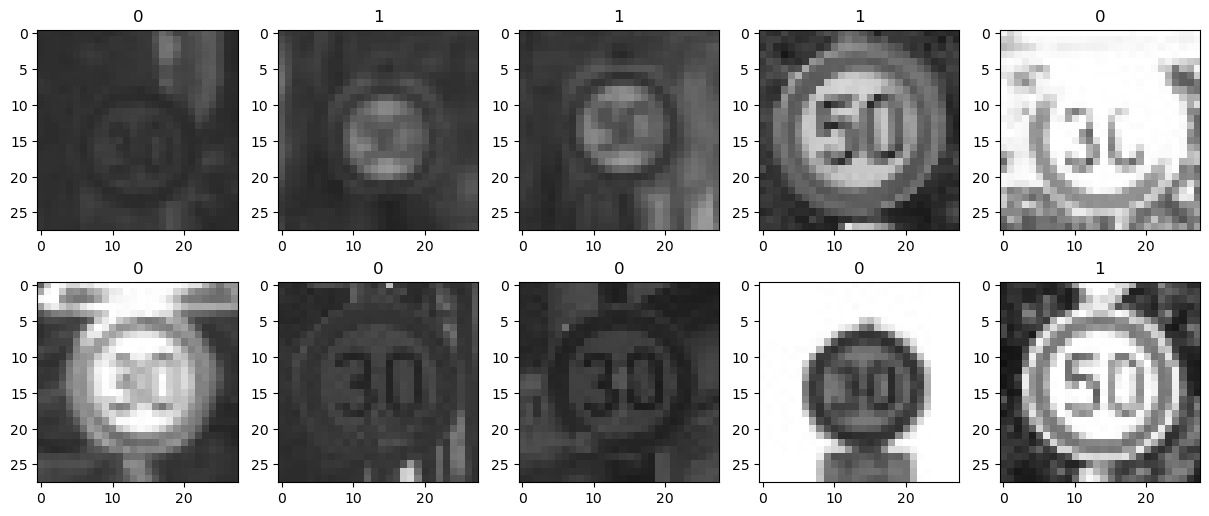

In [179]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

In [180]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

In [181]:
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "functional_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_27 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [182]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [183]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3517 
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2269
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1813
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1544
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1372
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1208
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1181
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1110  
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1035
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1047


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

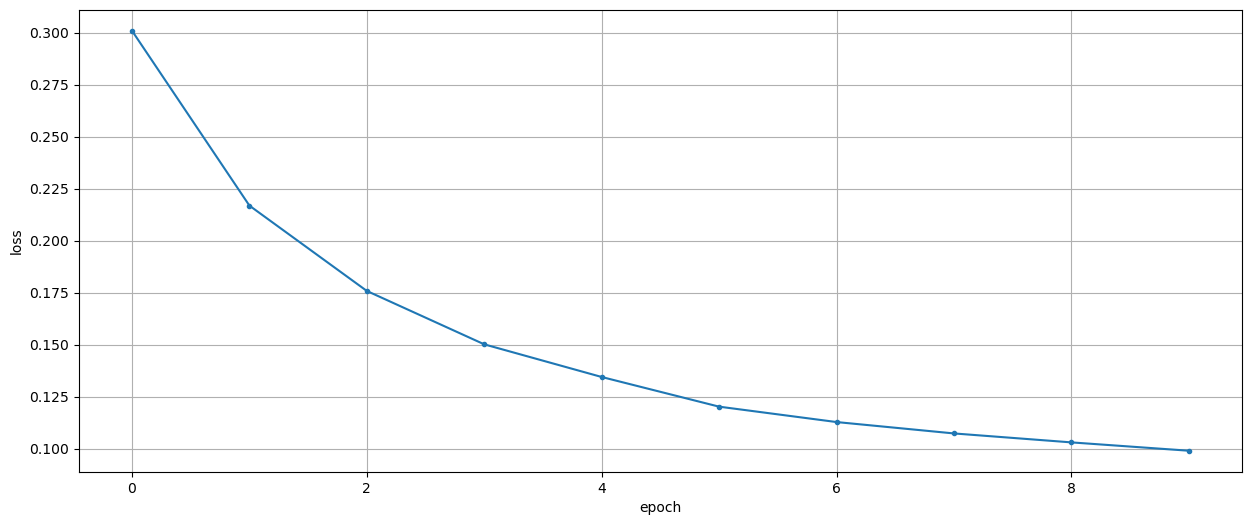

In [184]:
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[0.4185608] [0.4185608]


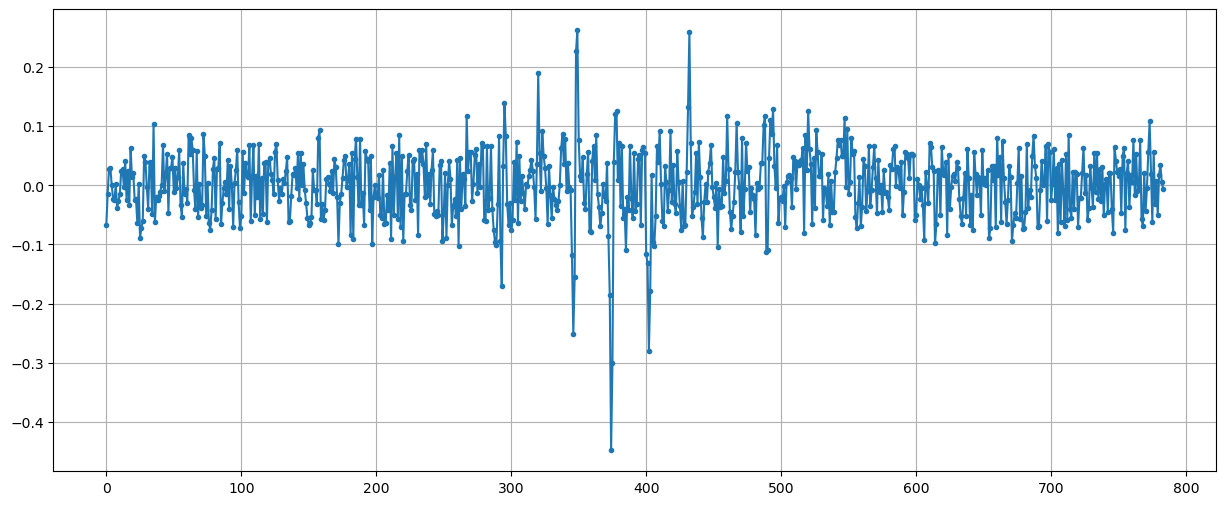

In [185]:
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

In [186]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[0.04633492]] 0


In [187]:
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5


140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [188]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))
print(correct, len(labels))

Accuracy 0.9266219239373602
4142 4470


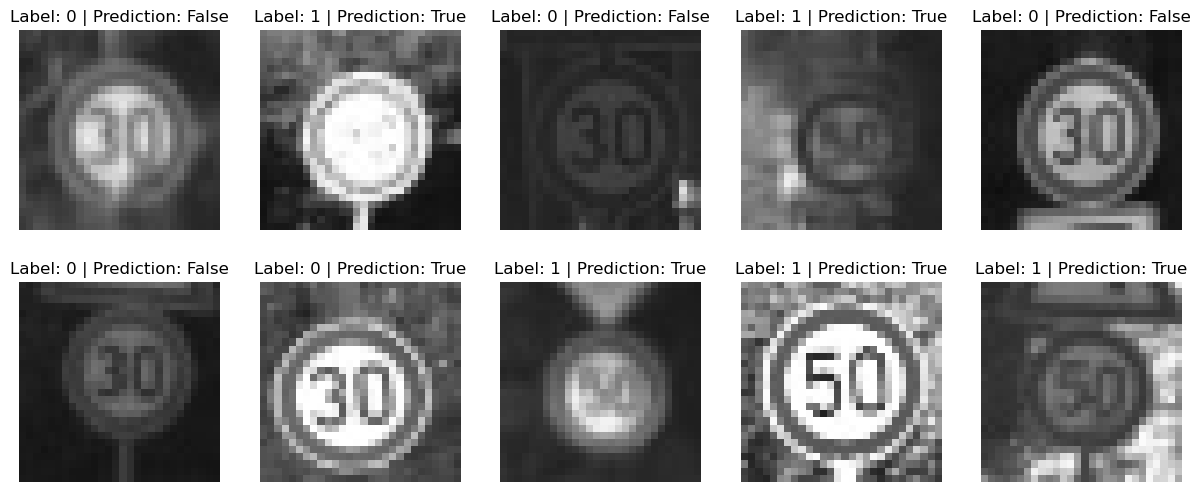

In [189]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

In [190]:
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(128, activation="relu")(inputs)
outputs = Dense(1, activation="linear")(outputs)
model = Model(inputs, outputs)

model.summary()

Model: "functional_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_28 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,609 (393.00 KB)

 Trainable params: 100,609 (393.00 KB)

 Non-trainable params: 0 (0.00 B)

In [191]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [192]:
history = model.fit(pixels, labels, epochs=100, batch_size=32)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4469
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1655
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1179
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1234
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0947
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0833
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0778
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0853
Epoch 9/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0752
Epoch 10/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0672
Epoch 11/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0717
Epoch 12/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0627
Epoch 13/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0792
Epoch 14/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0624
Epoch 15/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0

In [193]:
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5


140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [194]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))
print(correct, len(labels))

Accuracy 0.9986577181208054
4464 4470


In [195]:
wrong = 0
count = 0
wrong_array = []
for prediction, label in zip(predictions, labels):
    if prediction != label:
        wrong = wrong + 1
        wrong_array.append(count)
    count = count+1              
print('Incorrect', wrong)
print(wrong_array)


Incorrect 6
[678, 891, 3020, 3360, 3908, 4177]


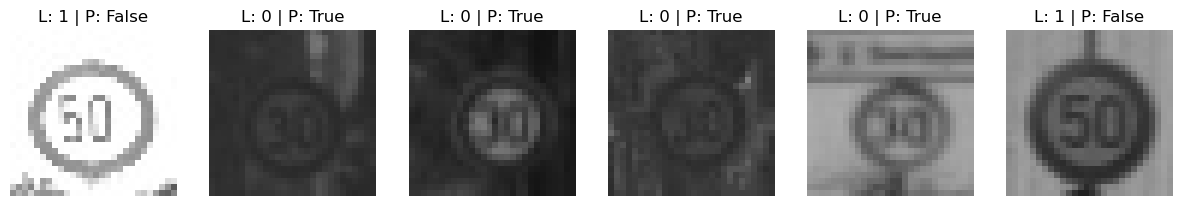

In [201]:
for i in range(0, wrong): 
    plt.subplot(1,wrong,i+1), plt.imshow(images[wrong_array[i]], cmap='gray', vmin=0, vmax=255)
    plt.title('L: ' + str(labels[wrong_array[i]]) + ' | P: ' + str(predictions[wrong_array[i]]))
    plt.axis(False)

In [ ]:
# увеличение слоев в комбинации с увеличением количества тренировок дают неплохой результат